#  Batch Gradient Descent

Article:

- [Batch, Mini Batch & Stochastic Gradient Descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)
- [Gradient Descent for Machine Learning](https://readmedium.com/en/https:/medium.com/gitconnected/fully-explained-gradient-descent-for-machine-learning-61f67a45ebd0)
- [Gradient Descent — Intuitive Overview](https://medium.com/@msong507/gradient-descent-intuitive-overview-43e7869e1545)

Videos:
- [Gradient Descent](https://www.youtube.com/watch?v=qg4PchTECck)

## 3.1.1 Batch Gradient Descent

Batch Gradient Descent is one of the fundamental techniques used for optimizing machine learning models, particularly in the context of linear and logistic regression. The primary goal of Batch Gradient Descent is to minimize the cost function, which measures the difference between the predicted values and the actual values in the training dataset.

In Batch Gradient Descent, the entire dataset is used to compute the gradient of the cost function. This gradient is then used to update the model parameters in the direction that reduces the cost. This process is repeated iteratively until the algorithm converges to a minimum point, ideally the global minimum, where the cost function reaches its lowest value.

Key steps in Batch Gradient Descent:
1. **Initialize Parameters**: Start with initial guesses for the model parameters.
2. **Compute Gradient**: Calculate the gradient of the cost function with respect to each parameter using the entire training dataset.
3. **Update Parameters**: Adjust the parameters by moving in the opposite direction of the gradient. The size of the steps taken is determined by the learning rate.
4. **Repeat**: Continue the process for a specified number of iterations or until the change in the cost function is below a certain threshold.

Batch Gradient Descent is effective for datasets that fit in memory and provides a stable convergence path, but it can be computationally expensive for very large datasets due to the need to process the entire dataset for each iteration.

In the following sections, we will demonstrate the Batch Gradient Descent algorithm through practical examples, including the optimization of a simple linear regression model.


<hr><hr>

## Gradient Descent for finding the optima of a function

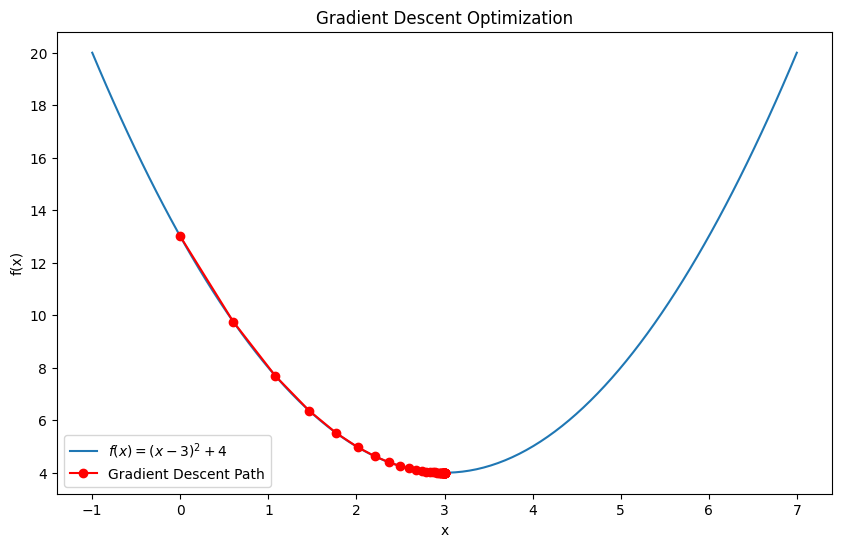

Optimal value of x: 2.9999571825692186
Function value at optimal x: 4.000000001833333


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return (x - 3) ** 2 + 4

# Define the gradient of the function
def gradient(x):
    return 2 * (x - 3)

# Gradient Descent settings
learning_rate = 0.1
n_iterations = 50
initial_x = 0  # Starting point

# Gradient Descent loop
x = initial_x
x_history = [x]
for iteration in range(n_iterations):
    grad = gradient(x)
    x = x - learning_rate * grad
    x_history.append(x)

# Plotting the function and the optimization path
x_vals = np.linspace(-1, 7, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = (x-3)^2 + 4$')
plt.plot(x_history, f(np.array(x_history)), 'ro-', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.show()

# Print the final result
print(f"Optimal value of x: {x}")
print(f"Function value at optimal x: {f(x)}")


<hr><hr>

## Batch GD for <u>Linear Regression</u>

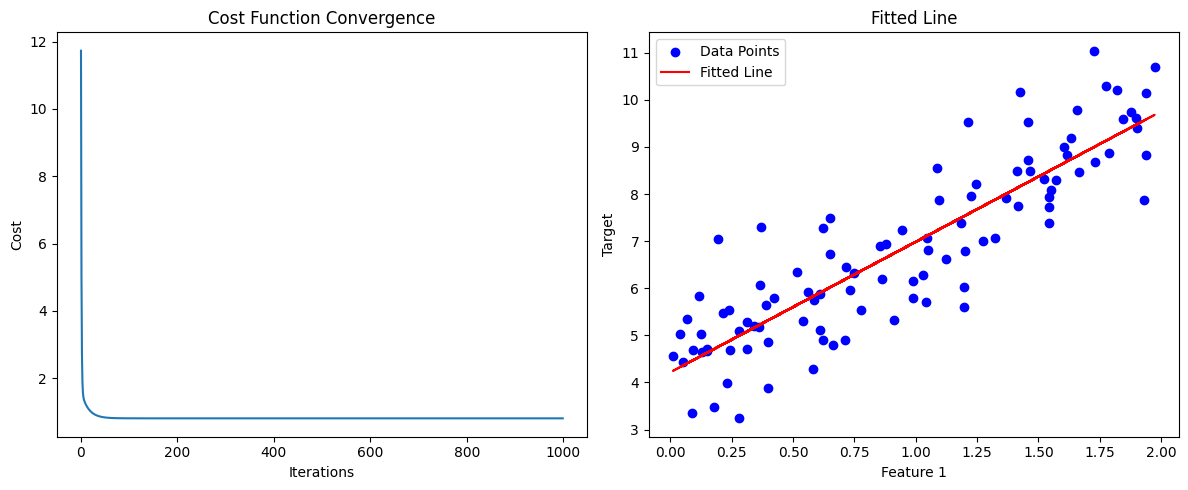

Parameters after 1000 iterations: [4.21509616 2.77011339]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance (intercept term)
X_b = np.c_[np.ones((100, 1)), X]

# Parameters initialization
theta = np.random.randn(2, 1)
m = len(X)

# Batch Gradient Descent settings
learning_rate = 0.1
n_iterations = 1000

# Store cost history for visualization
costs = []

# Batch Gradient Descent loop
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)
    costs.append(cost)

# Predict the fitted line
y_pred = X_b.dot(theta)

# Visualization
plt.figure(figsize=(12, 5))

# Plot the cost function convergence
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')

# Plot the fitted line
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Fitted Line', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Fitted Line')
plt.legend()

plt.tight_layout()
plt.show()

# Output the final parameters
print(f"Parameters after {n_iterations} iterations: {theta.ravel()}")


<hr><hr>

## Batch GD for <u>Logistic Regression</u>

Parameters: [[ 0.10000667]
 [ 4.72431104]
 [-1.38924627]]
Accuracy: 0.99


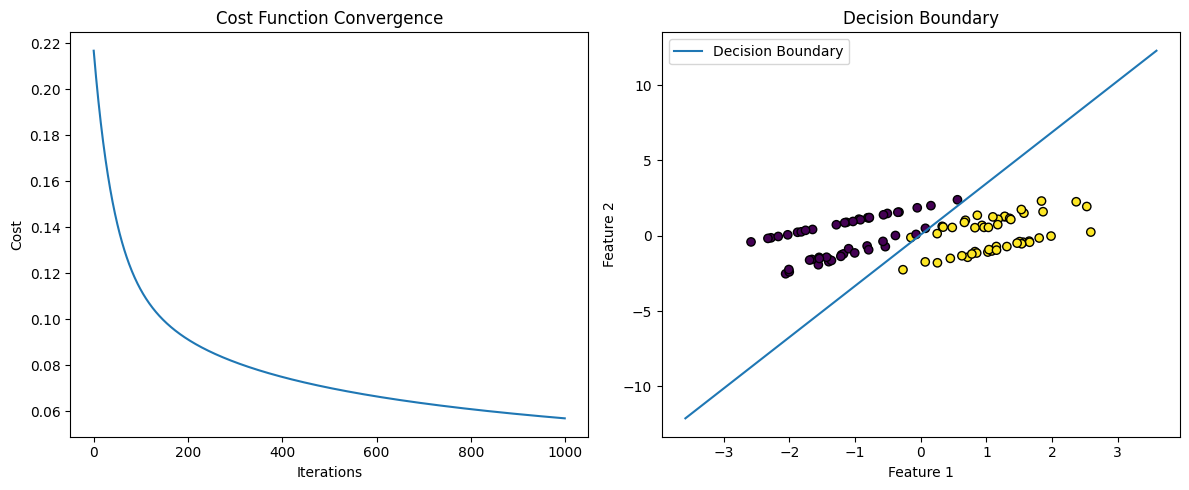

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic data for logistic regression
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1, 1)

# Add intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Parameters initialization
theta = np.random.randn(X_b.shape[1], 1)
m = len(X)

# Logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Batch Gradient Descent for Logistic Regression
learning_rate = 0.1
n_iterations = 1000

# Store cost history for visualization
costs = []

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(sigmoid(X_b.dot(theta)) - y)
    theta = theta - learning_rate * gradients
    cost = -1/m * np.sum(y * np.log(sigmoid(X_b.dot(theta))) + (1 - y) * np.log(1 - sigmoid(X_b.dot(theta))))
    costs.append(cost)

# Predict and calculate accuracy
y_pred = (sigmoid(X_b.dot(theta)) >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)
print(f"Parameters: {theta}")
print(f"Accuracy: {accuracy}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot the cost function convergence
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')

# Plot the decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', edgecolors='k')
x_values = [np.min(X[:, 0] - 1), np.max(X[:, 0] + 1)]
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()


### Conclusion

Batch Gradient Descent is a powerful optimization technique widely used in machine learning for training models such as linear and logistic regression. By leveraging the entire dataset to compute the gradient of the cost function, Batch Gradient Descent provides a stable and straightforward approach to minimize the cost function and find optimal model parameters.

In this section, we demonstrated the implementation of Batch Gradient Descent, starting from the initialization of parameters to the iterative process of updating them. We also visualized the convergence of the cost function and the resulting decision boundary or fitted line, depending on the problem context.

While Batch Gradient Descent is effective and easy to understand, it has limitations, especially with large datasets where computational efficiency becomes a concern. In such cases, alternative methods like Stochastic Gradient Descent (SGD) or Mini-Batch Gradient Descent can be more suitable.

Understanding Batch Gradient Descent is crucial as it forms the foundation for more advanced optimization algorithms. Its principles are applicable across various machine learning models and provide a basis for improving model performance through careful tuning of learning rates and iterations.

Overall, mastering Batch Gradient Descent equips practitioners with a robust tool for optimizing machine learning models and achieving better predictive accuracy.
